Dataset courtesy-https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('H:/ML projects/Stroke Prediction/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA

In [3]:
# shape
df.shape

(5110, 12)

In [4]:
# checking for duplicates
df.duplicated().sum()

0

In [5]:
# checking for null values
cols= df.columns.tolist()
for col in cols:
    null_percent= np.round(df[col].isna().mean()*100,2)
    if null_percent>0:
        print(col,' ',null_percent)

bmi   3.93


So only bmi column has null values

In [6]:
# Checking labels percent
label_percent=df['stroke'].value_counts(normalize=True)*100
np.round(label_percent,2)

0    95.13
1     4.87
Name: stroke, dtype: float64

0- patient didn't have stroke 1- patient had stroke. Its a highly imbalanced dataset.

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
cat_cols=df.select_dtypes(exclude=['float64']).columns.tolist()
num_cols=df.select_dtypes(include=['float64']).columns.tolist()
print('The categorical columns are:',cat_cols)
print('The numerical columns are:',num_cols)

The categorical columns are: ['id', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
The numerical columns are: ['age', 'avg_glucose_level', 'bmi']


## EDA of categorical features

In [9]:
fig = plt.figure(figsize=(18,15), dpi=1000)

#Gender
ax1 = plt.subplot2grid((3,3),(0,0))
df['gender'][df['stroke']==1].value_counts().plot.pie(autopct="%.1f%%")
ax1.set_ylabel('')
plt.title('Relationship between gender and stroke patients')

#Hypertension
ax1 = plt.subplot2grid((3,3), (0,1))
df['hypertension'][df['stroke']==1].value_counts().plot.pie(autopct="%.1f%%")
ax1.set_ylabel('')
plt.title('Relationship between Hypertension and Stroke Patients')

# Heart disease
ax1 = plt.subplot2grid((3,3), (0,2))
df['heart_disease'][df['stroke']==1].value_counts().plot.pie(autopct="%.1f%%")
ax1.set_ylabel('')
plt.title('Relationship between Heart Disease and Stroke Patients')

# Marital status
ax1 = plt.subplot2grid((3,3), (1,0))
df['ever_married'][df['stroke']==1].value_counts().plot.pie(autopct="%.1f%%")
ax1.set_ylabel('')
plt.title('Relationship between Marital Status and Stroke Patients')

# Work type
ax1 = plt.subplot2grid((3,3), (1,1))
df['work_type'][df['stroke']==1].value_counts().plot.pie(autopct="%.1f%%")
ax1.set_ylabel('')
plt.title('Relationship between Work Type and Stroke')

# Residence type
ax1 = plt.subplot2grid((3,3), (1,2))
df['Residence_type'][df['stroke']==1].value_counts().plot.pie(autopct="%.1f%%")
ax1.set_ylabel('')
plt.title(' Relationship between residence type and stroke patients')

# Smoking Status
ax1 = plt.subplot2grid((3,3), (2,0))
df['smoking_status'][df['stroke']==1].value_counts().plot.pie(autopct="%.1f%%")
ax1.set_ylabel('')
plt.title('Relationship between smoking status and stroke patients')
    
plt.show()    

###  Deductions from above visualization:
1. Females are bit more prone to stroke compared to males.

2. A majority of stroke patients did not have hypertension.

3. A majority of stroke patients had healthy heart with no such heart disease.

4. About 88.4% of stroke patients were married. 

5. 60% of stroke patients worked in private sector.

6. Almost equal percentage of stroke patients were from rural and urban areas.

7. 28% of stroke patients formerly smoked while 36% of patients never smoked. So smoking has no direct relationship with stroke.

## EDA of continuous features

In [10]:
num_cols

['age', 'avg_glucose_level', 'bmi']

In [11]:
# selecting data of patients who had stroke
df[['age','avg_glucose_level','bmi']][df['stroke']==1].describe()

,age,avg_glucose_level,bmi
count,249.000000,249.000000,209.000000
mean,67.728193,132.544739,30.471292
std,12.727419,61.921056,6.329452
min,1.320000,56.110000,16.900000
25%,59.000000,79.790000,26.400000
50%,71.000000,105.220000,29.700000
75%,78.000000,196.710000,33.700000
max,82.000000,271.740000,56.600000


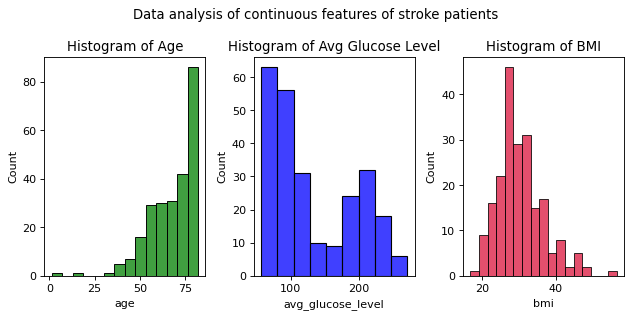

In [13]:
import seaborn as sns
fig, ax = plt.subplots(1,3,dpi=80,figsize=(8,4))
fig.suptitle('Data analysis of continuous features of stroke patients')

sns.histplot(ax=ax[0], x=df['age'][df['stroke']==1],fill=True,color='green')
ax[0].set_title('Histogram of Age')

sns.histplot(ax=ax[1], x=df['avg_glucose_level'][df['stroke']==1],fill=True,color='blue')
ax[1].set_title('Histogram of Avg Glucose Level')

sns.histplot(ax=ax[2], x=df['bmi'][df['stroke']==1],fill=True,color='crimson')
ax[2].set_title('Histogram of BMI')

plt.tight_layout()

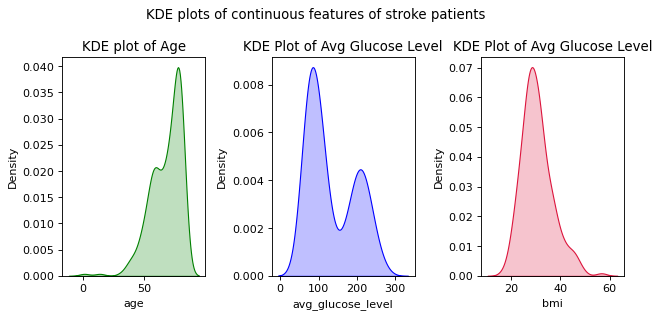

In [14]:
import seaborn as sns
fig, ax = plt.subplots(1,3,dpi=80,figsize=(8,4))
fig.suptitle('KDE plots of continuous features of stroke patients')

sns.kdeplot(ax=ax[0], x=df['age'][df['stroke']==1],fill=True,color='green')
ax[0].set_title('KDE plot of Age')

sns.kdeplot(ax=ax[1], x=df['avg_glucose_level'][df['stroke']==1],fill=True,color='blue')
ax[1].set_title('KDE Plot of Avg Glucose Level')

sns.kdeplot(ax=ax[2], x=df['bmi'][df['stroke']==1],fill=True,color='crimson')
ax[2].set_title('KDE Plot of Avg Glucose Level')

plt.tight_layout()

## Feature Engineering

We will convert continuous features age, avg_glucose_level and bmi to categorical features using binning and create 3 new features from these existing features.

In [15]:
# Dividing age in four classes
bins=[0,20,40,60,90]
labels = ['below 20s','young_adults','middle_aged','old']

df['age_class'] = pd.cut(df['age'],bins = bins, labels = labels)

In [16]:
# A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. 
# A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. 
# A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.
bins = [0,140,200,300]
labels = ['normal','prediabetic','diabetic']

df['diabetes_class'] = pd.cut(df['avg_glucose_level'],bins = bins, labels = labels)

In [17]:
# Below 18.5- underweight
# 18.5 – 24.9- healthy weight
# 25.0 – 29.9- overweight
# 30.0 and Above- obesity

bins=[0,18.5,25,30,90]
labels = ['underweight','healthy_weight','overweight','obesity']

df['bmi_class'] = pd.cut(df['bmi'],bins = bins, labels = labels)

In [18]:
df.drop(['id','age','bmi','avg_glucose_level'],axis=1,inplace=True)
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_class,diabetes_class,bmi_class
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,old,diabetic,obesity
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,old,diabetic,NaN
2,Male,0,1,Yes,Private,Rural,never smoked,1,old,normal,obesity
3,Female,0,0,Yes,Private,Urban,smokes,1,middle_aged,prediabetic,obesity
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,old,prediabetic,healthy_weight


In [19]:
# Converting data types of hypertension,heart disease column
df['hypertension']=df['hypertension'].astype('object')
df['heart_disease']=df['heart_disease'].astype('object')

In [20]:
df.dtypes

gender              object
hypertension        object
heart_disease       object
ever_married        object
work_type           object
Residence_type      object
smoking_status      object
stroke               int64
age_class         category
diabetes_class    category
bmi_class         category
dtype: object

In [21]:
df['age_class']=df['age_class'].astype('object')
df['diabetes_class']=df['diabetes_class'].astype('object')
df['bmi_class']=df['bmi_class'].astype('object')

In [22]:
df.dtypes

gender            object
hypertension      object
heart_disease     object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
stroke             int64
age_class         object
diabetes_class    object
bmi_class         object
dtype: object

In [23]:
X= df.drop('stroke',axis=1)
y= df['stroke']

In [24]:
# Checking cardinality and category distribution in categorical columns
cols= X.columns.tolist()
for col in cols:
    categories= X[col].value_counts(normalize=True)*100
    cardinality= X[col].nunique()
    print('Column Name:',col,'  ','Cardinality:',cardinality,'\n',np.round(categories,2))
    print('-'*30)

Column Name: gender    Cardinality: 3 
 Female    58.59
Male      41.39
Other      0.02
Name: gender, dtype: float64
------------------------------
Column Name: hypertension    Cardinality: 2 
 0    90.25
1     9.75
Name: hypertension, dtype: float64
------------------------------
Column Name: heart_disease    Cardinality: 2 
 0    94.6
1     5.4
Name: heart_disease, dtype: float64
------------------------------
Column Name: ever_married    Cardinality: 2 
 Yes    65.62
No     34.38
Name: ever_married, dtype: float64
------------------------------
Column Name: work_type    Cardinality: 5 
 Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: work_type, dtype: float64
------------------------------
Column Name: Residence_type    Cardinality: 2 
 Urban    50.8
Rural    49.2
Name: Residence_type, dtype: float64
------------------------------
Column Name: smoking_status    Cardinality: 4 
 never smoked       37.03
Unknown 

So all the columns have low cardinality. Hence we can go forward with One-Hot Encoding.

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.30)
print('Size of train set:',X_train.shape)
print('size of test set:',X_test.shape)

Size of train set: (3577, 10)
size of test set: (1533, 10)


## Data Preprocessing

 1. We have missing values in bmi_class column so we need to carry out imputation.
 2. As all the columns are categorical in nature we need to encode them.
 3. The dataset is highly imbalanced so we will balance it.
 


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.compose import ColumnTransformer

### 1. Imputation 

In [27]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)

X_train_1= imputer.transform(X_train)
X_test_1= imputer.transform(X_test)

### 2. Encoding

In [28]:
encoder= OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(X_train_1)

X_train_1= encoder.transform(X_train_1)
X_test_1= encoder.transform(X_test_1)

In [29]:
print(X_train_1.shape)
print(X_test_1.shape)

(3577, 31)
(1533, 31)


### 3. Oversampling followed by Undersampling

Our data is highly imbalanced so we will carry out sampling methods to balance it.

In [31]:
# Checking class distribution in train data
counter = Counter(y_train)
print('Class distribution prior to sampling:',counter)

Class distribution prior to sampling: Counter({0: 3403, 1: 174})


In [32]:
over = SMOTEN(sampling_strategy=0.20)
under = RandomUnderSampler(sampling_strategy=0.50)

# Over Sampling
X_train_rs, y_train_rs = over.fit_resample(X_train_1, y_train)
print('Class distribution after oversampling:',Counter(y_train_rs))

## Under Sampling
X_train_rs, y_train_rs = under.fit_resample(X_train_rs, y_train_rs)

print('Class distribution after undersampling:',Counter(y_train_rs))

Class distribution after oversampling: Counter({0: 3403, 1: 680})
Class distribution after undersampling: Counter({0: 1360, 1: 680})


In [33]:
print('X_train shape after final preprocessing:',X_train_rs.shape)
print('X_test shape after final preprocessing:',X_test_1.shape)


X_train shape after final preprocessing: (2040, 31)
X_test shape after final preprocessing: (1533, 31)


### Model Selection

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [36]:
model= GradientBoostingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
score=cross_val_score(model,X_train_rs,y_train_rs,scoring='f1',cv=cv,n_jobs=4)
print('Mean f1 score:', np.mean(score).round(3),'\t',np.std(score).round(3))


Mean f1 score: 0.794 	 0.039


In [38]:

model.fit(X_train_rs,y_train_rs)
y_pred_train= model.predict(X_train_rs)
y_pred_test= model.predict(X_test_1)

from sklearn.metrics import classification_report
names=['0-no stroke','1-stroke']

print('Classification report of train data:')
print(classification_report(y_train_rs, y_pred_train,target_names=names))
print('-'*50)
print('Classification report of test data:')
print(classification_report(y_test, y_pred_test,target_names=names))

Classification report of train data:
              precision    recall  f1-score   support

 0-no stroke       0.89      0.96      0.92      1360
    1-stroke       0.90      0.77      0.83       680

    accuracy                           0.90      2040
   macro avg       0.90      0.86      0.88      2040
weighted avg       0.90      0.90      0.89      2040

--------------------------------------------------
Classification report of test data:
              precision    recall  f1-score   support

 0-no stroke       0.96      0.95      0.95      1458
    1-stroke       0.15      0.17      0.16        75

    accuracy                           0.91      1533
   macro avg       0.55      0.56      0.56      1533
weighted avg       0.92      0.91      0.91      1533



## Hypertuning

In [39]:
print(model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators': [130,140,150,160],
            'max_features': ['auto','sqrt','log2'],
            'learning_rate': [0.01,0.05,0.1],
            'validation_fraction':[0.1,0.2,0.3]}

grid_cv= GridSearchCV(estimator=model,param_grid = param_grid, cv = cv,scoring='f1', n_jobs =4, verbose = 2)

# fitting the model for  grid search CV
grid_cv.fit(X_train_rs, y_train_rs) 


Fitting 30 folds for each of 108 candidates, totalling 3240 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [130, 140, 150, 160],
                         'validation_fraction': [0.1, 0.2, 0.3]},
             scoring='f1', verbose=2)

In [41]:
# Finding best parameter after tuning 

print("Best score for GridSearchCV is:",grid_cv.best_score_)
print("Optimal parameters for GridSearchCV is:",grid_cv.best_params_)       

Best score for GridSearchCV is: 0.8039652409872278
Optimal parameters for GridSearchCV is: {'learning_rate': 0.1, 'max_features': 'sqrt', 'n_estimators': 160, 'validation_fraction': 0.2}


In [42]:
tuned_model=grid_cv.best_estimator_
tuned_model.fit(X_train_rs,y_train_rs)

GradientBoostingClassifier(max_features='sqrt', n_estimators=160,
                           validation_fraction=0.2)

In [43]:

y_pred_train_tuned= tuned_model.predict(X_train_rs)
y_pred_test_tuned= tuned_model.predict(X_test_1)

from sklearn.metrics import classification_report
names=['0-no stroke','1-stroke']

print('Classification report of train data:')
print(classification_report(y_train_rs, y_pred_train_tuned,target_names=names))
print('*'*50)
print('Classification report of test data:')
print(classification_report(y_test, y_pred_test_tuned,target_names=names))

Classification report of train data:
              precision    recall  f1-score   support

 0-no stroke       0.89      0.97      0.93      1360
    1-stroke       0.92      0.76      0.83       680

    accuracy                           0.90      2040
   macro avg       0.90      0.86      0.88      2040
weighted avg       0.90      0.90      0.89      2040

**************************************************
Classification report of test data:
              precision    recall  f1-score   support

 0-no stroke       0.95      0.96      0.96      1458
    1-stroke       0.12      0.11      0.11        75

    accuracy                           0.92      1533
   macro avg       0.54      0.53      0.53      1533
weighted avg       0.91      0.92      0.91      1533

